In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
training_path = ".\\Task3\\Yale-FaceA\\trainingset\\"
test_path = ".\\Task3\\Yale-FaceA\\testset\\"
trainingpp_path = ".\\Task3\\Yale-FaceA\\trainingsetpp\\"

In [9]:
import os

def loadImgs(path: str, h=231, w=195):
    fileList = os.listdir(path)
    imgs = []
    for file in fileList:
        img = cv2.imread(path + file, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (w, h))
#         plt.imshow(np.uint8(img), cmap="gray")
        vector = img.reshape(h * w)
        imgs.append(vector)
    return np.mat(imgs).T

In [10]:
h = 231
w = 195

training_set = loadImgs(training_path, h, w)
trainingpp_set = loadImgs(trainingpp_path, h, w)  # training set with my pictures
test_set = loadImgs(test_path, h, w)
print(training_set.shape)
print(trainingpp_set.shape)
print(test_set.shape)


(45045, 135)
(45045, 144)
(45045, 11)


In [31]:
def pca(data, k: int):
    # Get the mean image:
    meanImg = data.mean(axis=1)
    # Normalize and get the deviation matrix:
    devi = data - meanImg 
    print("devi.shape:", devi.shape, type(devi))
    deviMat = devi.T * devi
    print(deviMat.shape)
    # Calculate feature vector and feature value:
    vals, vects = np.linalg.eig(np.mat(deviMat))
    # Get the index of the k biggest features:
    print(vals.shape, vects.shape)
    valsIndex = np.argsort(-vals)
    valsIndex = valsIndex[:k]
    # eigenvector of convariance matrix:
    eigenVects = devi * vects[:, valsIndex]
    
    return meanImg, eigenVects, devi
    

devi.shape: (45045, 135) <class 'numpy.matrixlib.defmatrix.matrix'>
(135, 135)
(135,) (135, 135)
meanImg: (45045, 1)
eigenVects: (45045, 15)
devi: (45045, 135)


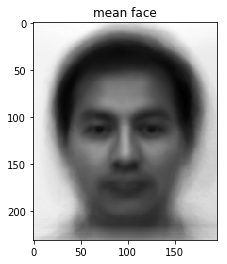

In [30]:
k = 15
meanImg, eigenVects, devi = pca(training_set, k)
print("meanImg:", meanImg.shape)
print("eigenVects:", eigenVects.shape)
print("devi:", devi.shape)
plt.title("mean face")
plt.imshow(np.uint8(meanImg.reshape(h, w)), cmap="gray")
plt.show()

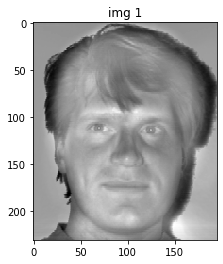

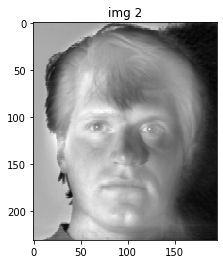

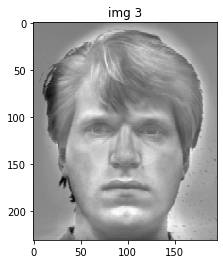

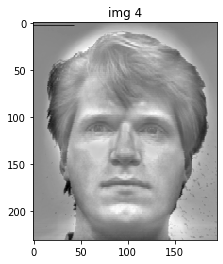

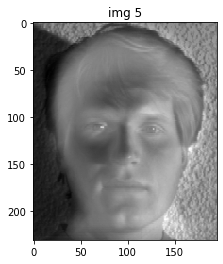

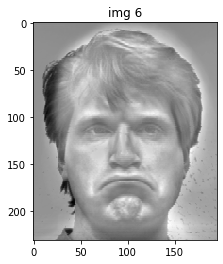

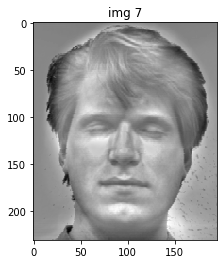

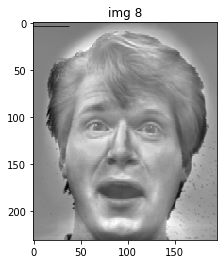

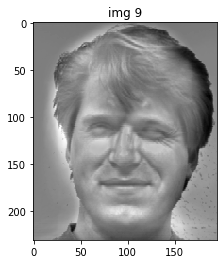

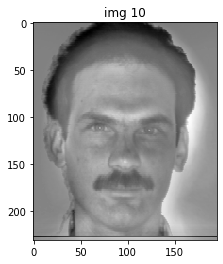

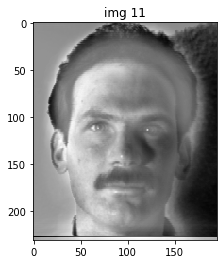

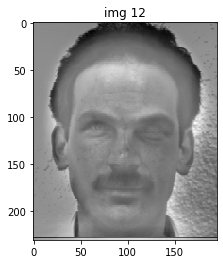

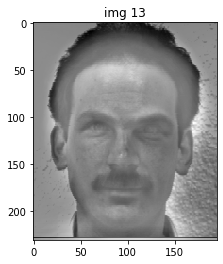

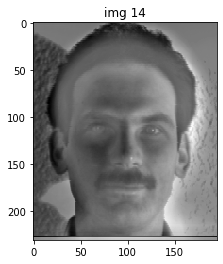

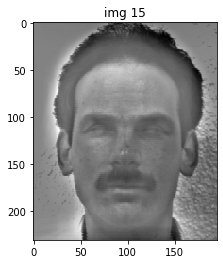

In [37]:
for i in range(k):
    img = (devi.T)[i].reshape(h, w)
    plt.title("img " + str(i+1))
    plt.imshow(img, cmap="gray")
    plt.show()


In [38]:
ref = test_set[:, 0]
# cv2.imshow("reference:", ref.reshape(h, w))
# cv2.waitKey(0)

In [39]:
def getSimilarFace(refImg, meanImg, eigenVects, devi, n=3):
    _, s = np.shape(devi)
    diff = refImg - meanImg
    # feature vector
    feaVect = eigenVects.T * diff
    # initialize result
    # res = [np.inf for _ in range(s)]
    res = np.array([np.inf for _ in range(s)])

    for i in range(s):
        trainVect = eigenVects.T * devi[:, i]
        distance = np.sum((np.array(feaVect) - np.array(trainVect)) ** 2)
        res[i] = distance
    
    resIndex = np.argsort(res)
    resIndex = resIndex[:n]
    return resIndex


D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


image index: 7
image index: 3
image index: 6


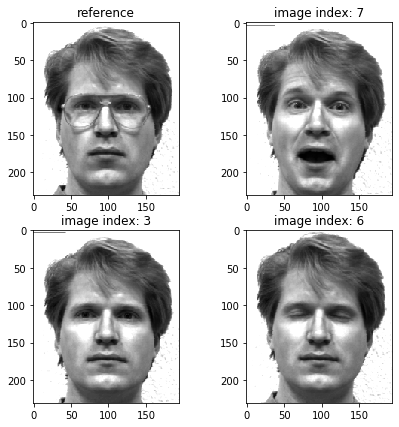

In [40]:
res_index = getSimilarFace(ref, meanImg, eigenVects, devi, n=3)
# cv2.imshow("reference", ref.reshape(h, w))
plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
plt.title("reference")
plt.imshow(ref.reshape(h, w), cmap="gray")
counter = 2
for index in res_index:
    img = training_set[:, index]
    img = img.reshape(h, w)
    plt.subplot(2, 2, counter)
    plt.title("image index: " + str(index))
    print("image index: " + str(index))
    plt.imshow(img.reshape(h, w), cmap="gray")
    counter += 1

plt.show()

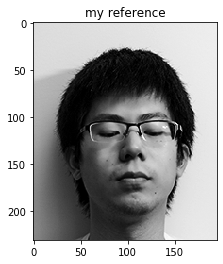

In [45]:
my_ref = test_set[:, -1]
plt.title("my reference")
plt.imshow(my_ref.reshape(h, w), cmap="gray")
plt.show()

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


image index: 76
image index: 40
image index: 121


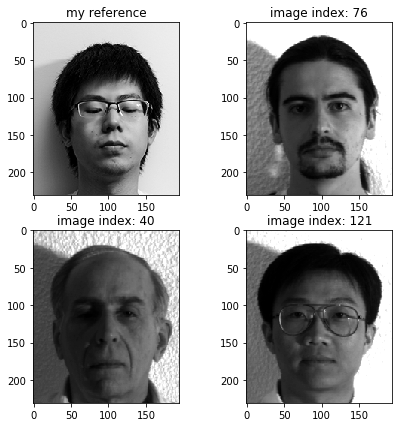

In [42]:
res_index = getSimilarFace(my_ref, meanImg, eigenVects, devi, n=3)
# cv2.imshow("reference", ref.reshape(h, w))
plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
plt.title("my reference")
plt.imshow(my_ref.reshape(h, w), cmap="gray")
counter = 2
for index in res_index:
    img = training_set[:, index]
    img = img.reshape(h, w)
    plt.subplot(2, 2, counter)
    plt.title("image index: " + str(index))
    print("image index: " + str(index))
    plt.imshow(img.reshape(h, w), cmap="gray")
    counter += 1

plt.show()

meanImg: (45045, 1)
eigenVects: (45045, 15)
devi: (45045, 144)


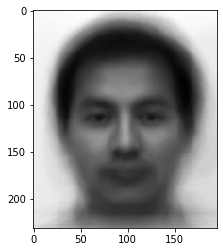

In [43]:
k = 15
meanImg, eigenVects, devi = pca(trainingpp_set, k)
print("meanImg:", meanImg.shape)
print("eigenVects:", eigenVects.shape)
print("devi:", devi.shape)
plt.imshow(np.uint8(meanImg.reshape(h, w)), cmap="gray")
plt.show()

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


image index: 135
image index: 139
image index: 76


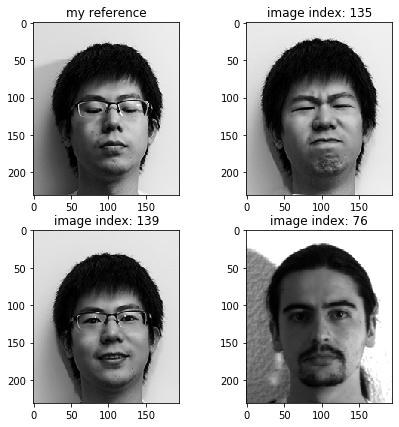

In [44]:
res_index = getSimilarFace(my_ref, meanImg, eigenVects, devi, n=3)
# cv2.imshow("reference", ref.reshape(h, w))
plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
plt.title("my reference")
plt.imshow(my_ref.reshape(h, w), cmap="gray")
counter = 2
for index in res_index:
    img = trainingpp_set[:, index]
    img = img.reshape(h, w)
    plt.subplot(2, 2, counter)
    plt.title("image index: " + str(index))
    print("image index: " + str(index))
    plt.imshow(img.reshape(h, w), cmap="gray")
    counter += 1

plt.show()

In [48]:
15 // 4

3

In [50]:
15 % 5

0